In [1]:
import os
import glob
import math
import obspy
import time
from obspy.clients.iris import Client
client = Client()
from matplotlib import pyplot as plt, patches
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import clear_output
import numpy as np
from sklearn.decomposition import PCA
from scipy import signal

In [2]:
from step9 import *

ddir = f"C:/Users/youzh/Documents/My documents(not synced)/sP_Workflow"
data_sac = f"{ddir}/Download/SAC"
wdir = f"{ddir}/Download/Verified"

if not os.path.exists(wdir):
    os.mkdir(wdir)

In [3]:
import pandas as pd
def getEvtID(event):
    with open(f'{inpath}/arrivals.txt') as f:
        first_line = f.readline()
    evt_id = first_line.split()[0]
    return evt_id

In [ ]:
auto_filter(st, Tp, p_len, sPmP_len, sPn_len, SRsPmP, SRsPn, snr)

['CI.CJV2..BHR.SAC.bp.cut', 'CI.CJV2..BHT.SAC.bp.cut', 'CI.CJV2..BHZ.SAC.bp.cut']
3 Trace(s) in Stream:
CI.CJV2..BHR | 2022-01-17T15:55:50.905489Z - 2022-01-17T15:58:07.055489Z | 100.0 Hz, 13616 samples
CI.CJV2..BHT | 2022-01-17T15:55:50.905489Z - 2022-01-17T15:58:07.055489Z | 100.0 Hz, 13616 samples
CI.CJV2..BHZ | 2022-01-17T15:55:50.905489Z - 2022-01-17T15:58:07.055489Z | 100.0 Hz, 13616 samples 11.58 79.6105


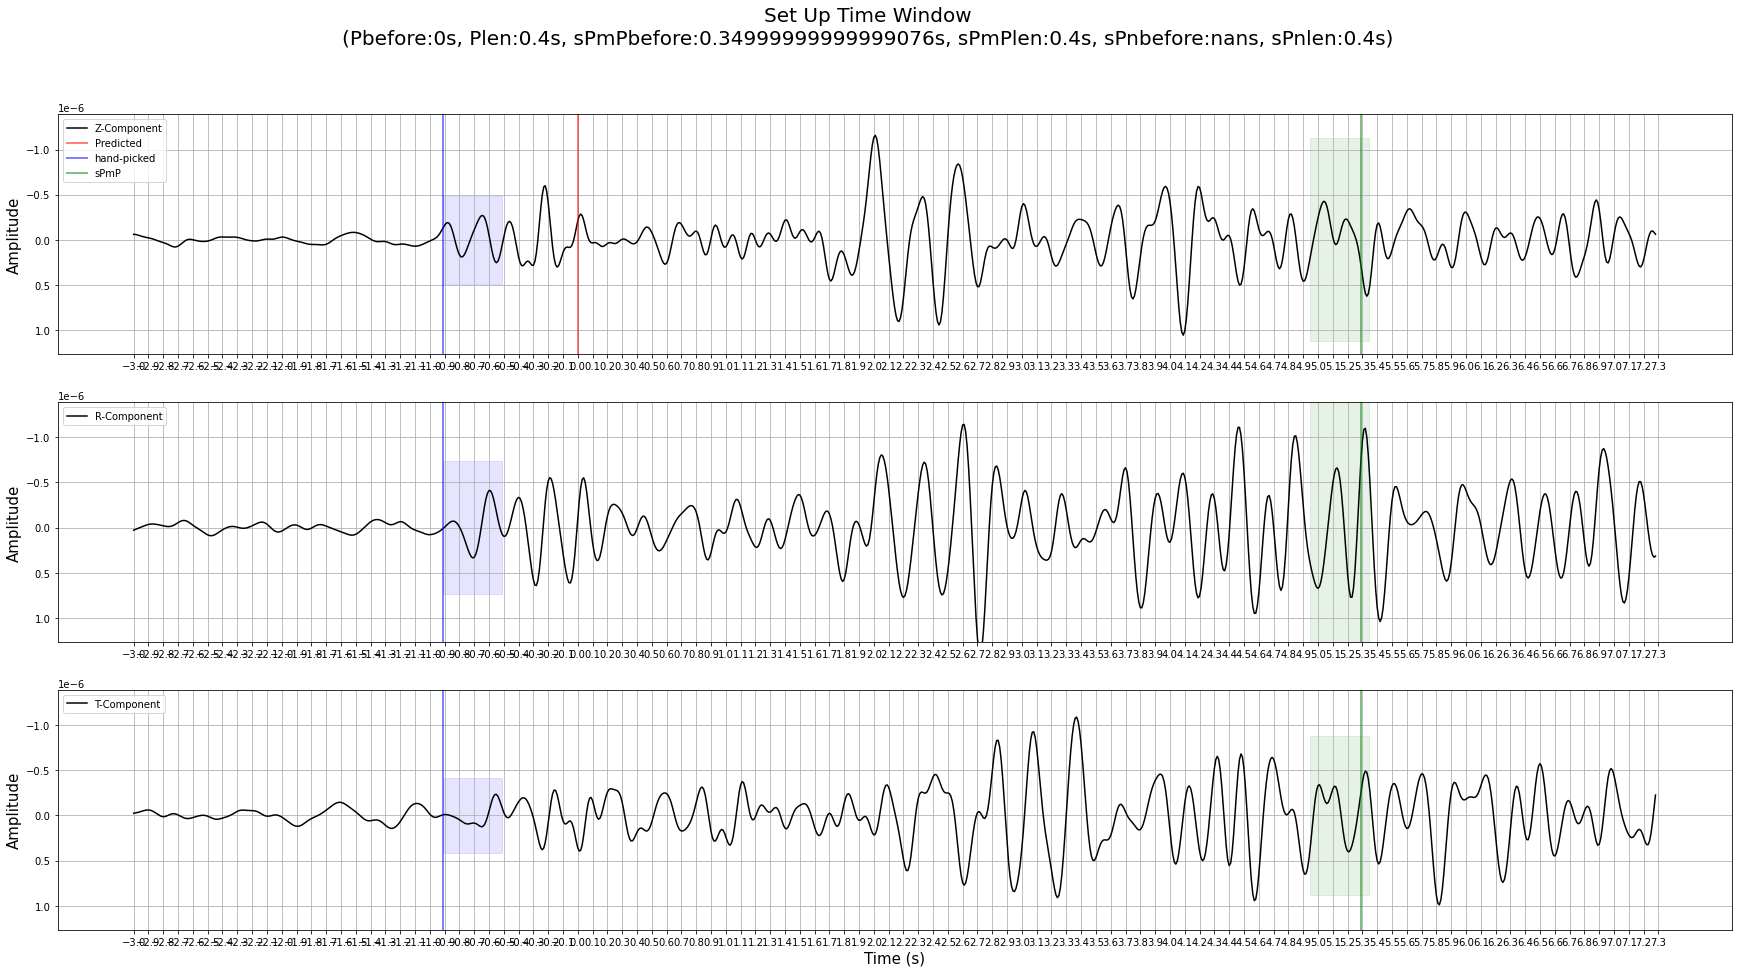

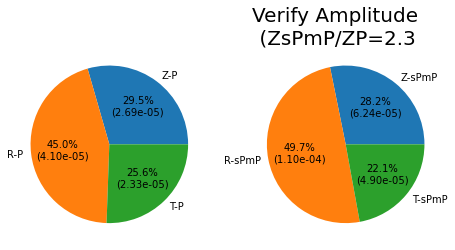

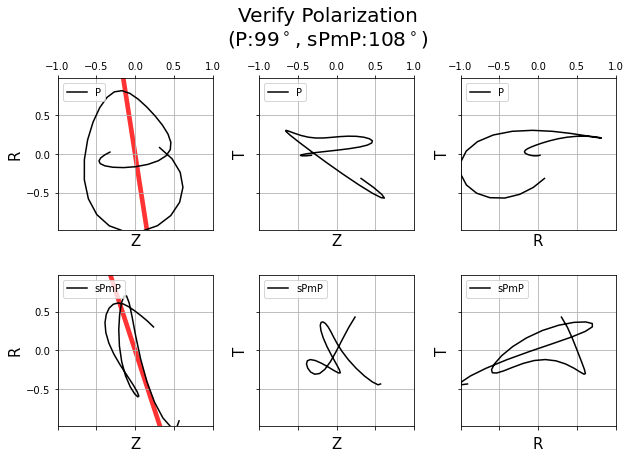

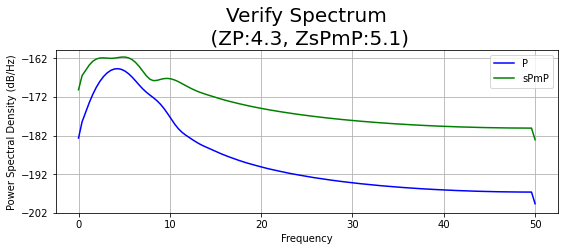

In [6]:
### Check the event one by one
evtid =178

with open(f"{ddir}/Autojudge-large.info","r") as files:
    #print("something")
    for i,file in enumerate(files):
        if i == evtid - 1:
            
            evt = file.split()[1]
            sta = file.split()[2]
            Tp_handpicked = float(file.split()[4])
            Tp = Tp_handpicked
            p_length = float(file.split()[6])
              
            TsPmP = float(file.split()[8])
            TsPmp_autorefined = float(file.split()[10])
            sPmP_length = float(file.split()[12])
            
            TsPn = float(file.split()[14])
            TsPn_autorefined = float(file.split()[16])
            sPn_len = float(file.split()[18])
          
            inpath = os.path.join(data_sac, evt)
            os.chdir(inpath)
            print(glob.glob(f"{sta}*[RTZ].SAC.bp.cut"))

            st = obspy.read(f"{sta}*[RTZ].SAC.bp.cut")
            sachd = st[0].stats.sac
            print(st,sachd["evdp"],sachd["dist"])

        ### tune these parameters to set proper windows
            Tpbefore = 0
            Tplen = p_length
            Tspnbefore = -(TsPn_autorefined -TsPn)
            Tspnlen = sPn_len
            Tspmbefore = -(TsPmp_autorefined - TsPmP)
            Tspmlen = sPmP_length
            
            #auto_refined = vef_composite(st, Tp, TsPmP, ST1, TsPn= "nan", Tplen=0.6,  Tspmlen=0.6, Tspnlen=0.6)
#             auto_refined = vef_composite( st, Tp=Tp, TsPmP=TsPmP, ST1=0.7, TsPn= TsPn, ST2=0.7,  Tplen = 0.3, Tspmlen=0.4, Tspnlen=0.4)
#             print(auto_refined)
            #print(Tspmbefore)
            
            fig1 = set_window(st, Tp, TsPmP, TsPn, Twbefore=3, Twafter=2, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig2 = vef_amp(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig3 = vef_polaz(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig4 = vef_sptm(st, Tp, TsPmP, TsPn, PN=2**8, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            
            
            #quality = input("overall score: a(4 checks), b(3 checks), c(2 checks), f(skip)")
#             if quality == "a" or quality == "b" or quality == "c":
#                 record = open(f"{ddir}./record.txt", "a")
#                 evt_id = getEvtID(evt)
#                 TsPmP = TsPmP-Tspmbefore
#                 TsPn = TsPn-Tspnbefore
#                 record.write(f" {evt_id} {evt} {sta} {Tp} {Tplen} {TsPmP} {Tspmlen} {TsPn} {Tspnlen} {quality}\n")
#                 record.close()

In [7]:

filtered_vals = auto_filter(st, Tp, 0.2, 0.2, 0.2, 1, 1, 15)
if filtered_vals != False:
    Tp, p_len, PTsPmP, TsPmP_autorefined, sPmP_len, PTsPn, sPn_len, TsPn_autorefined = filtered_vals
    f = open(f"C:/Users/youzh/Documents/My documents(not synced)/sP_Workflow/temp_judge.info","a")
    f.write("evt: {} {} Tp_handpicked: {} p_length: {} TsPmP: {} TsPmp_autorefined: {} sPmP_length {} \
         TsPn: {} TsPn_autorefined: {} sPn_len: {} \n"\
             .format(evt, sta, Tp, p_len, PTsPmP, TsPmP_autorefined, sPmP_len, PTsPn, TsPn_autorefined, sPn_len))
    f.close()
with open(f"{ddir}/temp_judge.info","r") as files:
    #print("something")
    for i,file in enumerate(files):
        if i == evtid - 1:
            
            evt = file.split()[1]
            sta = file.split()[2]
            Tp_handpicked = float(file.split()[4])
            Tp = Tp_handpicked
            p_length = float(file.split()[6])
              
            TsPmP = float(file.split()[8])
            TsPmp_autorefined = float(file.split()[10])
            sPmP_length = float(file.split()[12])
            
            TsPn = float(file.split()[14])
            TsPn_autorefined = float(file.split()[16])
            sPn_len = float(file.split()[18])
          
            inpath = os.path.join(data_sac, evt)
            os.chdir(inpath)
            print(glob.glob(f"{sta}*[RTZ].SAC.bp.cut"))

            st = obspy.read(f"{sta}*[RTZ].SAC.bp.cut")
            sachd = st[0].stats.sac
            print(st,sachd["evdp"],sachd["dist"])

        ### tune these parameters to set proper windows
            Tpbefore = 0
            Tplen = p_length
            Tspnbefore = -(TsPn_autorefined -TsPn)
            Tspnlen = sPn_len
            Tspmbefore = -(TsPmp_autorefined - TsPmP)
            Tspmlen = sPmP_length
            
            #auto_refined = vef_composite(st, Tp, TsPmP, ST1, TsPn= "nan", Tplen=0.6,  Tspmlen=0.6, Tspnlen=0.6)
#             auto_refined = vef_composite( st, Tp=Tp, TsPmP=TsPmP, ST1=0.7, TsPn= TsPn, ST2=0.7,  Tplen = 0.3, Tspmlen=0.4, Tspnlen=0.4)
#             print(auto_refined)
            #print(Tspmbefore)
            
            fig1 = set_window(st, Tp, TsPmP, TsPn, Twbefore=3, Twafter=2, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig2 = vef_amp(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig3 = vef_polaz(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            fig4 = vef_sptm(st, Tp, TsPmP, TsPn, PN=2**8, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
            

NameError: name 'auto_filter' is not defined

In [5]:
Tplen = 0.4
Tspnlen = 0.4
Tspmlen = 0.3


auto_refined = vef_composite( st, Tp=Tp, TsPmP=TsPmP, ST1=0.9, TsPn= TsPn, ST2=0.7,  Tplen = Tplen, Tspmlen=Tspmlen, Tspnlen=Tspnlen)
if auto_refined != False:
    TsPn_autorefined = float(auto_refined[1])
    TsPmp_autorefined = float(auto_refined[0])
    Tspnbefore = -(TsPn_autorefined -TsPn)
    Tspmbefore = -(TsPmp_autorefined - TsPmP)
    fig1 = set_window(st, Tp, TsPmP, TsPn, Twbefore=3, Twafter=2, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
    fig2 = vef_amp(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
    fig3 = vef_polaz(st, Tp, TsPmP, TsPn, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)
    fig4 = vef_sptm(st, Tp, TsPmP, TsPn, PN=2**8, Tpbefore=Tpbefore, Tplen=Tplen, Tspmbefore=Tspmbefore, Tspmlen=Tspmlen, Tspnbefore=Tspnbefore, Tspnlen=Tspnlen)

else:
    print("no better refinement")
    
quality = input("overall score: a(4 checks), b(3 checks), c(2 checks), f(skip)")
if quality == "a" or quality == "b" or quality == "c":
    record = open(f"{ddir}./record.txt", "a")
    evt_id = getEvtID(evt)
    TsPmP = round(TsPmp_autorefined, 3)
    TsPn = round(TsPn_autorefined, 3)
    if str(TsPn) == "nan":
        Tspnlen = "nan"
    record.write(f" {evt_id} {evt} {sta} {Tp} {Tplen} {TsPmP} {Tspmlen} {TsPn} {Tspnlen} {quality}\n")
    record.close()

NameError: name 'vef_composite' is not defined

In [109]:
print(str(TsPn)=="nan")

True


In [126]:
print(st)


3 Trace(s) in Stream:
CI.DTP..BHR | 2022-01-05T01:24:09.449565Z - 2022-01-05T01:26:19.249565Z | 100.0 Hz, 12981 samples
CI.DTP..BHT | 2022-01-05T01:24:09.449565Z - 2022-01-05T01:26:19.249565Z | 100.0 Hz, 12981 samples
CI.DTP..BHZ | 2022-01-05T01:24:09.449565Z - 2022-01-05T01:26:19.249565Z | 100.0 Hz, 12981 samples
